[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/repos-especializacion-UdeA/trabajo-final_AA1/blob/main/notebooks_pasos_previos/merge_databases.ipynb)

# Combinación de todas las bases de datos

El siguiente notebook explora de manera sencilla un archivo de matlab donde se guarda la información de un sensor.

In [1]:
try:
    import scipy.io
except ImportError:
    !pip install scipy

## 1. Librerias y configuraciones previas

In [2]:
import sys
import os

# Get the absolute path of the current notebook
notebook_path = "."
print(notebook_path)
try:
    import google.colab
    !git clone https://github.com/repos-especializacion-UdeA/trabajo-final_AA1.git
    %cd /content/trabajo-final_AA1/notebooks_pasos_previos   
    %pwd
    ruta_base = '/content/trabajo-final_AA1/notebooks_pasos_previos/'
    sys.path.append(ruta_base)
except ImportError:
    print("El notebook no se está ejecutando en Google Colab.")
    ruta_base = './'

.
El notebook no se está ejecutando en Google Colab.


In [3]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib


# Gestion de librerias
# ==============================================================================
from importlib import reload

# Matemáticas y estadísticas
# ==============================================================================
import math

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Formateo y estilo
# ==============================================================================
from IPython.display import Markdown, display

# Biblioteca scipy y componentes
# ==============================================================================
import scipy.io
from scipy import signal

## 2. Funciones

In [4]:
# Funciones externas
# ==============================================================================
from utils.funciones1 import multiple_plot
from utils.funciones2 import test_hola, graficar_medida, graficar_medida2, filter_signal, \
                             segmentar_data_base, aplanar_data_base, aplanar_ventana

In [5]:
test_hola()

Hola amigos


## 3. Carga del dataset

In [6]:
DATA_PATH = "./datasets/"

archivos_mat = ['S1_A1_E1.mat', 
         'S2_A1_E1.mat', 
         'S3_A1_E1.mat', 
         'S4_A1_E1.mat', 
         'S5_A1_E1.mat', 
         'S6_A1_E1.mat', 
         'S7_A1_E1.mat', 
         'S8_A1_E1.mat', 
         'S9_A1_E1.mat', 
         'S10_A1_E1.mat', 
         'S11_A1_E1.mat', 
         'S12_A1_E1.mat', 
         'S13_A1_E1.mat', 
         'S14_A1_E1.mat', 
         'S15_A1_E1.mat', 
         'S16_A1_E1.mat', 
         'S17_A1_E1.mat', 
         'S18_A1_E1.mat', 
         'S19_A1_E1.mat', 
         'S20_A1_E1.mat', 
         'S21_A1_E1.mat', 
         'S22_A1_E1.mat', 
         'S23_A1_E1.mat', 
         'S24_A1_E1.mat', 
         'S25_A1_E1.mat', 
         'S26_A1_E1.mat',
         'S27_A1_E1.mat']

Carga de cada una de las bases de datos asociadas a los sugetos y combinación en una sola.

In [7]:
## Carga de la base de datos
data_base = pd.DataFrame()

for i in range(len(archivos_mat)):
    ruta_archivo_mat = DATA_PATH = "./datasets/" + archivos_mat[i]
    archivo_mat = scipy.io.loadmat(ruta_archivo_mat)
    # Obtencion de las columnas de interes
    df_emg = pd.DataFrame(archivo_mat['emg'])
    df_emg.columns = ['emg_' + str(col + 1) for col in df_emg.columns]
    df_restimulus = pd.DataFrame(archivo_mat['restimulus'])
    df_restimulus.rename(columns={0: 'label'}, inplace= True)
    df_repetition = pd.DataFrame(archivo_mat['rerepetition'])
    df_repetition.rename(columns={0: 'rep'},inplace= True)
    df_subject = pd.DataFrame({'s': [i + 1] * df_repetition.shape[0]}, dtype='int8')
    df_subject =  pd.concat([df_subject, df_emg, df_repetition, df_restimulus], axis=1)
    print(f"Muestras sujeto {i + 1}: {df_subject.shape[0]}")
    data_base = pd.concat([data_base, df_subject], ignore_index=True)

Muestras sujeto 1: 101014
Muestras sujeto 2: 100686
Muestras sujeto 3: 100720
Muestras sujeto 4: 100835
Muestras sujeto 5: 100894
Muestras sujeto 6: 101083
Muestras sujeto 7: 100817
Muestras sujeto 8: 100854
Muestras sujeto 9: 100925
Muestras sujeto 10: 100778
Muestras sujeto 11: 100899
Muestras sujeto 12: 100920
Muestras sujeto 13: 100948
Muestras sujeto 14: 100785
Muestras sujeto 15: 101508
Muestras sujeto 16: 101191
Muestras sujeto 17: 101675
Muestras sujeto 18: 101323
Muestras sujeto 19: 101299
Muestras sujeto 20: 101565
Muestras sujeto 21: 101732
Muestras sujeto 22: 101884
Muestras sujeto 23: 101221
Muestras sujeto 24: 101698
Muestras sujeto 25: 101549
Muestras sujeto 26: 101642
Muestras sujeto 27: 100948


## Informacion de la base de datos

In [8]:
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731393 entries, 0 to 2731392
Data columns (total 13 columns):
 #   Column  Dtype  
---  ------  -----  
 0   s       int8   
 1   emg_1   float64
 2   emg_2   float64
 3   emg_3   float64
 4   emg_4   float64
 5   emg_5   float64
 6   emg_6   float64
 7   emg_7   float64
 8   emg_8   float64
 9   emg_9   float64
 10  emg_10  float64
 11  rep     uint8  
 12  label   uint8  
dtypes: float64(10), int8(1), uint8(2)
memory usage: 216.2 MB


### Contenido de los primeros registros del dataframe

In [9]:
# Primeros registros
data_base.head(2)

,s,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,1,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342,0,0
1,1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293,0,0


In [10]:
# Primeros registros sugeto 1
df_s1 = data_base[data_base['s'] == 1]
df_s1.head()

,s,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,1,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342,0,0
1,1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293,0,0
2,1,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0391,0.0024,0.0244,0,0
3,1,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.0171,0,0
4,1,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0146,0,0


## Preprocesamiento de la señal

### Filtrado de ruido

A continuación se realiza un filtrado de ruido de la señal

In [11]:
# perform 2-order 1Hz low-pass filter
emgs_df_filt =  filter_signal(data_base.iloc[:,1:11])  
data_base_filter =  pd.concat([data_base['s'], emgs_df_filt, data_base['rep'] , data_base['label']], axis=1)
data_base_filter.head()

,s,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,1,0.067523,0.002402,0.002399,0.002403,0.002395,0.009800,0.0024,0.050357,0.0024,0.034192,0,0
1,1,0.066284,0.002402,0.002402,0.002404,0.002395,0.009474,0.0024,0.049707,0.0024,0.032820,0,0
2,1,0.065045,0.002403,0.002405,0.002404,0.002395,0.009149,0.0024,0.049050,0.0024,0.031452,0,0
3,1,0.063810,0.002403,0.002409,0.002405,0.002395,0.008827,0.0024,0.048390,0.0024,0.030091,0,0
4,1,0.062581,0.002404,0.002412,0.002406,0.002395,0.008507,0.0024,0.047726,0.0024,0.028743,0,0


## Grafica de la señal mECG

A continuación se muestra la grafica de la señal de electromiografia superficial para el sugeto 1 ejecutando ejecutando las 12 posturas. 

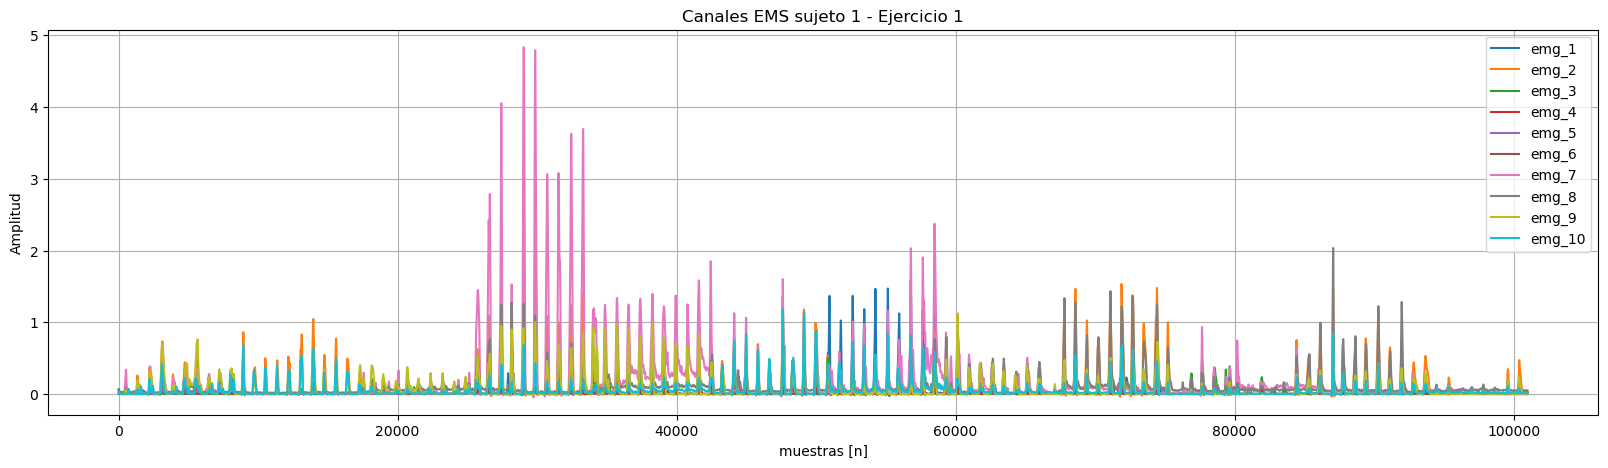

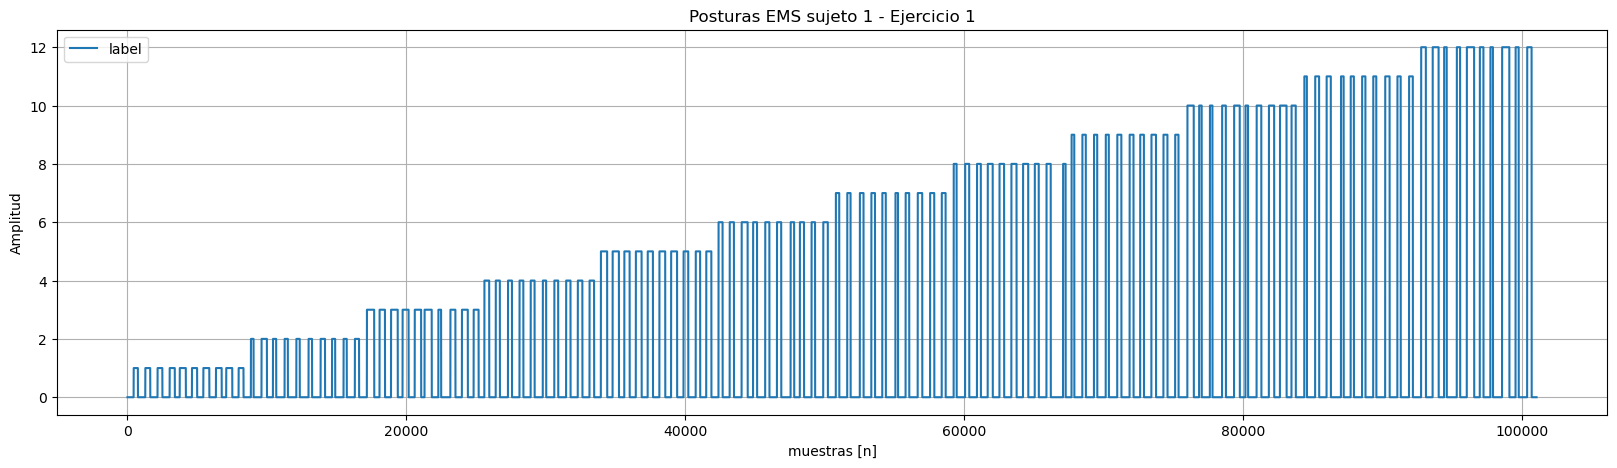

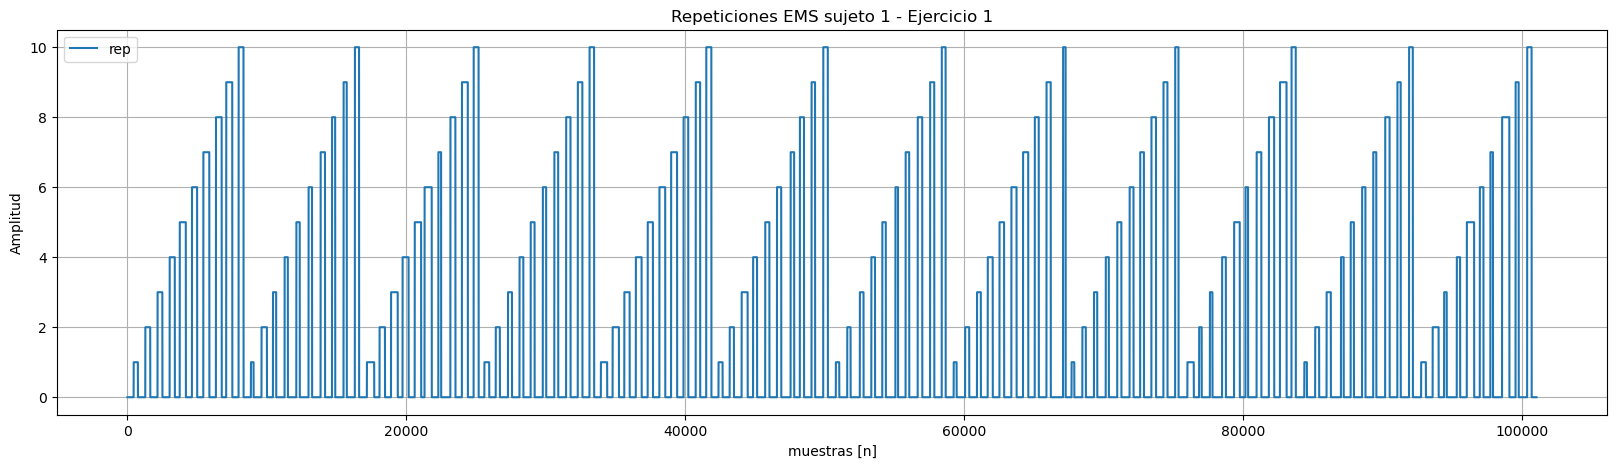

In [12]:
df_s1 = data_base_filter[data_base_filter['s'] == 1]
graficar_medida(df_s1, 
                columnas=['emg_1','emg_2','emg_3','emg_4','emg_5','emg_6','emg_7','emg_8','emg_9','emg_10'], 
                titulo = "Canales EMS sujeto 1 - Ejercicio 1")

graficar_medida(df_s1, 
                columnas=['label'], 
                titulo = "Posturas EMS sujeto 1 - Ejercicio 1")

graficar_medida(df_s1, 
                columnas=['rep'], 
                titulo = "Repeticiones EMS sujeto 1 - Ejercicio 1")

En la siguiente grafica se hace enfasis en las repeticiones del ejercicio 1

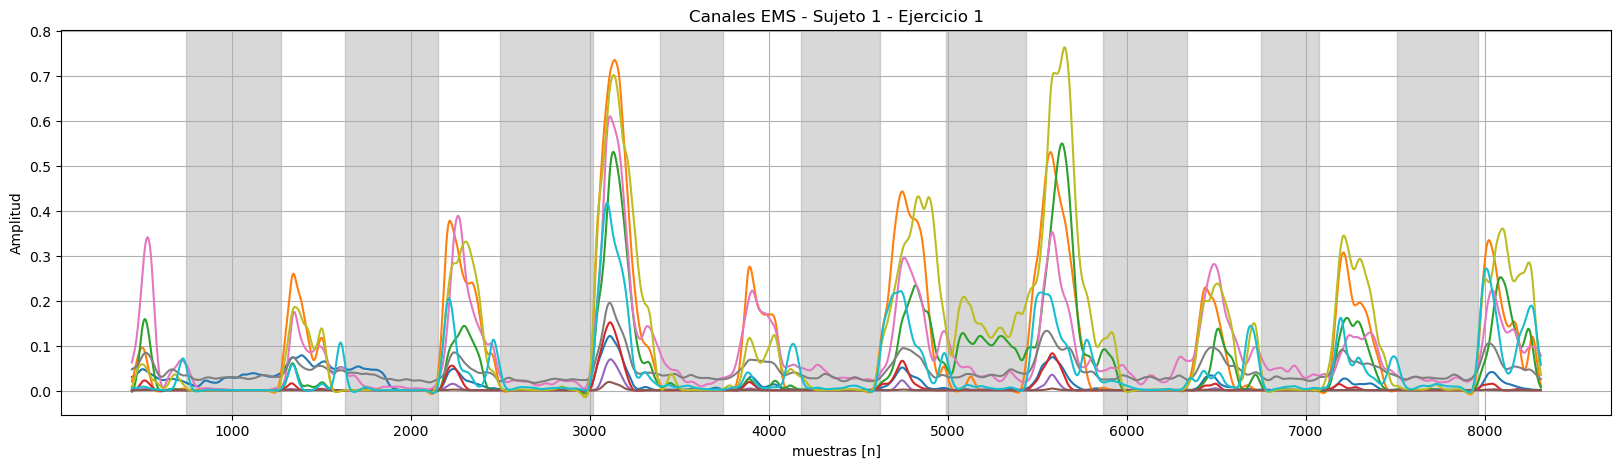

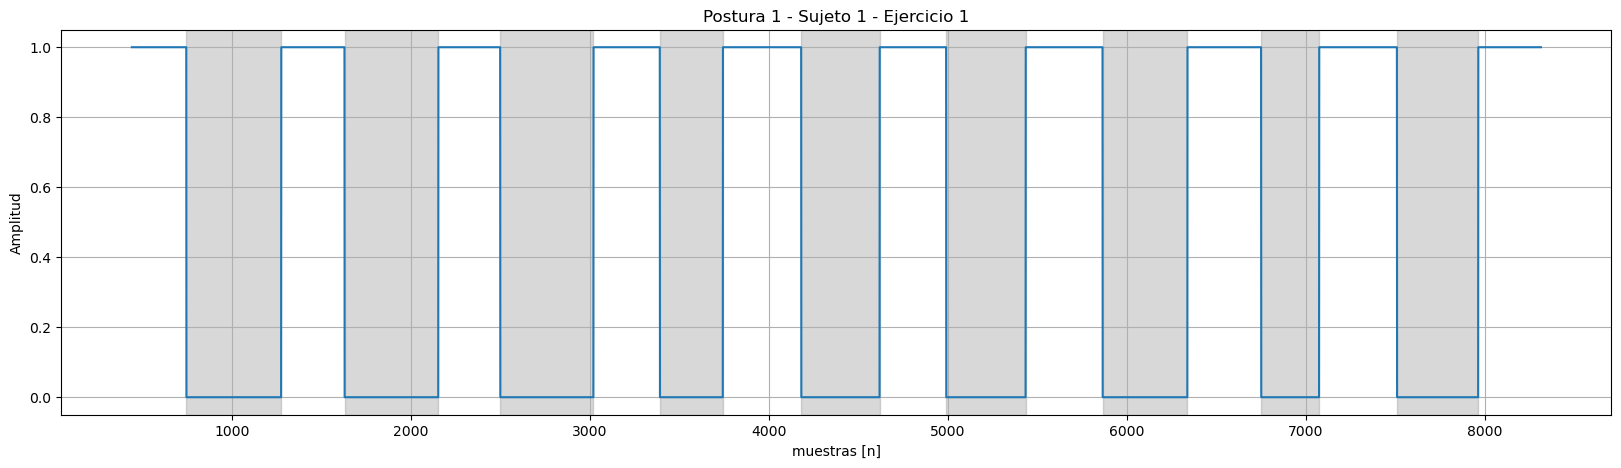

In [13]:
graficar_medida2(df_s1, 
                 columnas = df_s1.columns[1:11], 
                 labels = df_s1['label'],
                 num = 1, 
                 fs = None,
                 titulo="Canales EMS - Sujeto 1 - Ejercicio 1"
                 )

graficar_medida2(df_s1, 
                 columnas = ['label'], 
                 labels = df_s1['label'],
                 num = 1, 
                 fs = None,
                 titulo="Postura 1 - Sujeto 1 - Ejercicio 1"
                 )

In [14]:
data_base_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731393 entries, 0 to 2731392
Data columns (total 13 columns):
 #   Column  Dtype  
---  ------  -----  
 0   s       int8   
 1   emg_1   float64
 2   emg_2   float64
 3   emg_3   float64
 4   emg_4   float64
 5   emg_5   float64
 6   emg_6   float64
 7   emg_7   float64
 8   emg_8   float64
 9   emg_9   float64
 10  emg_10  float64
 11  rep     uint8  
 12  label   uint8  
dtypes: float64(10), int8(1), uint8(2)
memory usage: 216.2 MB


In [15]:
print(data_base_filter.shape)
print(data_base_filter.isna().sum())

(2731393, 13)
s         0
emg_1     0
emg_2     0
emg_3     0
emg_4     0
emg_5     0
emg_6     0
emg_7     0
emg_8     0
emg_9     0
emg_10    0
rep       0
label     0
dtype: int64


## Segmentacion

Se van a usar ventanas de 30 muestras sobrelapadas en 10 muestras:

![segmentacion](windowing-example.png)

In [16]:
numero_de_sujetos = 2
sujetos_muestra = data_base_filter[data_base_filter['s'] <= numero_de_sujetos]
segments = segmentar_data_base(sujetos_muestra, 30, 10)

9369


In [17]:
print(data_base_filter.shape)
print(len(segments))

(2731393, 13)
9369


In [18]:
data_base_filter.head(50)

,s,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,1,0.067523,0.002402,0.002399,0.002403,0.002395,0.009800,0.0024,0.050357,0.0024,0.034192,0,0
1,1,0.066284,0.002402,0.002402,0.002404,0.002395,0.009474,0.0024,0.049707,0.0024,0.032820,0,0
2,1,0.065045,0.002403,0.002405,0.002404,0.002395,0.009149,0.0024,0.049050,0.0024,0.031452,0,0
3,1,0.063810,0.002403,0.002409,0.002405,0.002395,0.008827,0.0024,0.048390,0.0024,0.030091,0,0
4,1,0.062581,0.002404,0.002412,0.002406,0.002395,0.008507,0.0024,0.047726,0.0024,0.028743,0,0
5,1,0.061362,0.002404,0.002415,0.002407,0.002395,0.008192,0.0024,0.047061,0.0024,0.027410,0,0
6,1,0.060156,0.002405,0.002419,0.002407,0.002396,0.007881,0.0024,0.046395,0.0024,0.026096,0,0
7,1,0.058966,0.002406,0.002422,0.002408,0.002396,0.007576,0.0024,0.045729,0.0024,0.024805,0,0
8,1,0.057793,0.002406,0.002425,0.002409,0.002396,0.007278,0.0024,0.045064,0.0024,0.023539,0,0
9,1,0.056641,0.002407,0.002428,0.002410,0.002396,0.006986,0.0024,0.044399,0.0024,0.022300,0,0


In [19]:
type(segments)

list

In [20]:
segments[0]

,s,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,1,0.067523,0.002402,0.002399,0.002403,0.002395,0.009800,0.0024,0.050357,0.0024,0.034192,0,0
1,1,0.066284,0.002402,0.002402,0.002404,0.002395,0.009474,0.0024,0.049707,0.0024,0.032820,0,0
2,1,0.065045,0.002403,0.002405,0.002404,0.002395,0.009149,0.0024,0.049050,0.0024,0.031452,0,0
3,1,0.063810,0.002403,0.002409,0.002405,0.002395,0.008827,0.0024,0.048390,0.0024,0.030091,0,0
4,1,0.062581,0.002404,0.002412,0.002406,0.002395,0.008507,0.0024,0.047726,0.0024,0.028743,0,0
5,1,0.061362,0.002404,0.002415,0.002407,0.002395,0.008192,0.0024,0.047061,0.0024,0.027410,0,0
6,1,0.060156,0.002405,0.002419,0.002407,0.002396,0.007881,0.0024,0.046395,0.0024,0.026096,0,0
7,1,0.058966,0.002406,0.002422,0.002408,0.002396,0.007576,0.0024,0.045729,0.0024,0.024805,0,0
8,1,0.057793,0.002406,0.002425,0.002409,0.002396,0.007278,0.0024,0.045064,0.0024,0.023539,0,0
9,1,0.056641,0.002407,0.002428,0.002410,0.002396,0.006986,0.0024,0.044399,0.0024,0.022300,0,0


In [21]:
segments[1]

,s,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,1,0.045784,0.002419,0.002461,0.002423,0.002402,0.004338,0.0024,0.037171,0.0024,0.010982,0,0
1,1,0.044986,0.002420,0.002464,0.002425,0.002403,0.004152,0.0024,0.036524,0.0024,0.010183,0,0
2,1,0.044221,0.002422,0.002467,0.002426,0.002404,0.003976,0.0024,0.035881,0.0024,0.009423,0,0
3,1,0.043488,0.002423,0.002470,0.002428,0.002405,0.003808,0.0024,0.035243,0.0024,0.008701,0,0
4,1,0.042789,0.002425,0.002474,0.002429,0.002406,0.003649,0.0024,0.034611,0.0024,0.008017,0,0
5,1,0.042121,0.002426,0.002477,0.002431,0.002407,0.003500,0.0024,0.033986,0.0024,0.007370,0,0
6,1,0.041485,0.002428,0.002480,0.002432,0.002408,0.003358,0.0024,0.033369,0.0024,0.006760,0,0
7,1,0.040880,0.002429,0.002484,0.002434,0.002410,0.003225,0.0024,0.032763,0.0024,0.006185,0,0
8,1,0.040305,0.002431,0.002487,0.002435,0.002411,0.003100,0.0024,0.032168,0.0024,0.005646,0,0
9,1,0.039760,0.002432,0.002491,0.002437,0.002413,0.002984,0.0024,0.031586,0.0024,0.005140,0,0


In [22]:
segments[2]

,s,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,1,0.035728,0.002449,0.002534,0.002452,0.002435,0.002151,0.0024,0.026515,0.0024,0.001529,0,0
1,1,0.035540,0.002450,0.002538,0.002453,0.002438,0.002110,0.0024,0.026208,0.0024,0.001349,0,0
2,1,0.035379,0.002451,0.002542,0.002454,0.002440,0.002073,0.0024,0.025930,0.0024,0.001190,0,0
3,1,0.035246,0.002452,0.002546,0.002455,0.002443,0.002041,0.0024,0.025682,0.0024,0.001049,0,0
4,1,0.035139,0.002453,0.002549,0.002455,0.002446,0.002013,0.0024,0.025462,0.0024,0.000926,0,0
5,1,0.035058,0.002454,0.002553,0.002455,0.002449,0.001988,0.0024,0.025271,0.0024,0.000820,0,0
6,1,0.035000,0.002455,0.002556,0.002456,0.002452,0.001967,0.0024,0.025109,0.0024,0.000730,0,0
7,1,0.034966,0.002455,0.002559,0.002455,0.002455,0.001950,0.0024,0.024974,0.0024,0.000654,0,0
8,1,0.034954,0.002456,0.002562,0.002455,0.002458,0.001936,0.0024,0.024865,0.0024,0.000592,0,0
9,1,0.034961,0.002456,0.002564,0.002455,0.002461,0.001924,0.0024,0.024782,0.0024,0.000544,0,0


In [23]:
w_plana = aplanar_ventana(segments[0])
w_plana

,s_0,emg_1_0,emg_2_0,emg_3_0,emg_4_0,emg_5_0,emg_6_0,emg_7_0,emg_8_0,emg_9_0,...,emg_3_29,emg_4_29,emg_5_29,emg_6_29,emg_7_29,emg_8_29,emg_9_29,emg_10_29,rep,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.009423,0.008701,0.008017,0.00737,0.00676,0.006185,0.005646,0.00514,0,0


In [24]:
data_base_to_model = aplanar_data_base(segments)

In [25]:
data_base_to_model.shape

(9369, 332)

In [26]:
data_base_to_model.head(2)

,s_0,emg_1_0,emg_2_0,emg_3_0,emg_4_0,emg_5_0,emg_6_0,emg_7_0,emg_8_0,emg_9_0,...,emg_3_29,emg_4_29,emg_5_29,emg_6_29,emg_7_29,emg_8_29,emg_9_29,emg_10_29,rep,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.009423,0.008701,0.008017,0.00737,0.00676,0.006185,0.005646,0.005140,0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.001190,0.001049,0.000926,0.00082,0.00073,0.000654,0.000592,0.000544,0,0


Hasta aqui queda la base de datos estructurada. La siguiente parte consiste en meterla al modelo y rezar para que de.

## Referencias

* https://github.com/parasgulati8/NinaPro-Helper-Library
* https://github.com/Lif3line/nina_helper_package_mk2
* https://github.com/cnzero/NinaproCNN/tree/master
* https://github.com/sebastiankmiec/NinaTools
* https://github.com/sun2009ban/divide_NinaPro_database_5
* https://github.com/tsagkas/sEMG-HandGestureRecognition 
* https://repositorio.unbosque.edu.co/items/61d39597-5a61-491c-909a-849e53efe8ad
* https://github.com/parasgulati8/NinaPro-Helper-Library/blob/master/